# Load COCO dataset

Here you can find the code to load the COCO dataset. Especially, the data loader is implemented to speed up the process of loading the data.

In [1]:
# load the refCOCOg dataset


!pip install gdown
import gdown

url = "https://drive.google.com/uc?id=1xijq32XfEm6FPhUb7RsZYWHc2UuwVkiq"
gdown.download(url)

!tar -xvf /content/refcocog.tar.gz

!rm /content/refcocog.tar.gz

import pickle
import numpy as np
import json
import matplotlib.pyplot as plt
import os

from PIL import Image

with open("./refcocog/annotations/refs(umd).p", "rb") as fp:
  annotations = pickle.load(fp)

  train_data = sorted([d for d in annotations if d["split"]=="train"], key=lambda d: d["file_name"])
  val_data = sorted([d for d in annotations if d["split"]=="val"], key=lambda d: d["image_id"])
  test_data = sorted([d for d in annotations if d["split"]=="test"], key=lambda d: d["image_id"])


  # image_ids = []
  # for d in train_data:
  #   d["file_name"] = os.path.join("./refcocog/images/", f"{d['file_name'][:-12]}.jpg")
    
  # for d in val_data:
  #   d["file_name"] = os.path.join("./refcocog/images/", f"{d['file_name'][:-12]}.jpg")
  
  # for d in test_data:
  #   d["file_name"] = os.path.join("./refcocog/images/", f"{d['file_name'][:-12]}.jpg")

  # print(len([d for d in train_data if d["image_id"]==9]))

  entry = train_data[0]

  print(json.dumps(entry, indent=4, default=str))

  # img = Image.open(entry["file_name"])

  # plt.title(entry["sentences"][0]["raw"])
  # plt.imshow(img)
  # plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=1xijq32XfEm6FPhUb7RsZYWHc2UuwVkiq
To: /content/refcocog.tar.gz
100%|██████████| 13.5G/13.5G [05:22<00:00, 41.8MB/s]


Streaming output truncated to the last 5000 lines.
./refcocog/images/COCO_train2014_000000419396.jpg
./refcocog/images/COCO_train2014_000000433336.jpg
./refcocog/images/COCO_train2014_000000567523.jpg
./refcocog/images/COCO_train2014_000000451554.jpg
./refcocog/images/COCO_train2014_000000439855.jpg
./refcocog/images/COCO_train2014_000000044594.jpg
./refcocog/images/COCO_train2014_000000194276.jpg
./refcocog/images/COCO_train2014_000000272463.jpg
./refcocog/images/COCO_train2014_000000485426.jpg
./refcocog/images/COCO_train2014_000000002774.jpg
./refcocog/images/COCO_train2014_000000346160.jpg
./refcocog/images/COCO_train2014_000000199829.jpg
./refcocog/images/COCO_train2014_000000210057.jpg
./refcocog/images/COCO_train2014_000000544117.jpg
./refcocog/images/COCO_train2014_000000440673.jpg
./refcocog/images/COCO_train2014_000000006151.jpg
./refcocog/images/COCO_train2014_000000514391.jpg
./refcocog/images/COCO_train2014_000000247459.jpg
./refcocog/images/COCO_train2014_000000141257.jpg

In [2]:
# print(json.dumps(test_data[0], indent=4, default=str))

from copy import deepcopy

d = deepcopy(test_data[0])

d["file_name"] = f'{"_".join(d["file_name"].split("_")[:3])}.jpg'

print(d["file_name"])

with open("./refcocog/annotations/instances.json", "rb") as fp:
  data = json.load(fp)
  print(data.keys())

  print(data["images"][0])

  t = sorted([d for d in data["annotations"]], key=lambda x: x["image_id"])

  print([d["image_id"] for d in t[:10]])

  for e in data["annotations"]:
    if e["id"]>=1000000 and e["id"]<1040000: #1038967
      print("BBOX = ",json.dumps(e["id"], indent=4))
      break

COCO_train2014_000000000656.jpg
dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])
{'license': 1, 'file_name': 'COCO_train2014_000000131074.jpg', 'coco_url': 'http://mscoco.org/images/131074', 'height': 428, 'width': 640, 'date_captured': '2013-11-21 01:03:06', 'flickr_url': 'http://farm9.staticflickr.com/8308/7908210548_33e532d119_z.jpg', 'id': 131074}
[9, 9, 9, 9, 9, 9, 9, 9, 25, 25]
BBOX =  1038967


In [3]:
import os
import json

from torch.utils.data import Dataset

class RefCOCOg(Dataset):
    def __init__(self, refs, annotations, split="train"):

        self.dataset = [{"file_name": os.path.join("./refcocog/images/", f'{"_".join(elem["file_name"].split("_")[:3])}.jpg'),
                            "caption": elem["sentences"][0]["raw"],
                            "ann_id": int(elem["file_name"].split("_")[3][:-4]),
                            "bbox": annotations[int(elem["file_name"].split("_")[3][:-4])]}
                        for elem in [d for d in refs if d["split"]==split]]

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx]
    
    def __call__(self, idx):
        print(json.dumps(self.dataset[idx], indent=4))

In [4]:
# Load refs and annotations
import pickle

with open("./refcocog/annotations/refs(umd).p", "rb") as fp:
  refs = pickle.load(fp)

with open("./refcocog/annotations/instances.json", "rb") as fp:
  data = json.load(fp)
  annotations = dict(sorted({ann["id"]: ann["bbox"] for ann in data["annotations"]}.items()))

In [5]:
train_dataset = RefCOCOg(refs=refs, annotations=annotations, split="train")

print(train_dataset[0])
print(train_dataset)
print(len(train_dataset))
train_dataset(0)

{'file_name': './refcocog/images/COCO_train2014_000000519404.jpg', 'caption': 'Two woman one in black eatting and the other has a white shirt at the desk', 'ann_id': 1241542, 'bbox': [0.0, 45.95, 238.92, 408.64]}
42226
{
    "file_name": "./refcocog/images/COCO_train2014_000000519404.jpg",
    "caption": "Two woman one in black eatting and the other has a white shirt at the desk",
    "ann_id": 1241542,
    "bbox": [
        0.0,
        45.95,
        238.92,
        408.64
    ]
}


Caption:  Two woman one in black eatting and the other has a white shirt at the desk


(-0.5, 639.5, 479.5, -0.5)

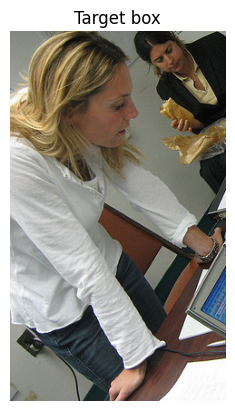

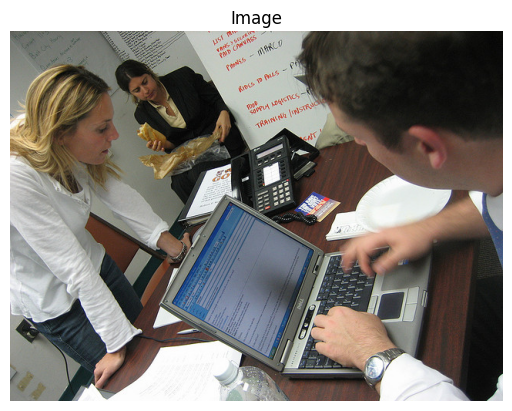

In [ ]:
# show an example of the crop

print('Caption: ',train_dataset[0]['caption'])


x_min = int(train_dataset[0]['bbox'][0])
x_max = x_min + int(train_dataset[0]['bbox'][2])

y_min = int(train_dataset[0]['bbox'][1])
y_max = y_min + int(train_dataset[0]['bbox'][3])

plt.imshow(plt.imread(train_dataset[0]['file_name'])[y_min:y_max,x_min:x_max])
plt.title('Target box')
plt.axis('off')

plt.figure()

plt.imshow(plt.imread(train_dataset[0]['file_name']))
plt.title('Image')
plt.axis('off')